# Classification

### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Data preparation

In [2]:
#data_url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'
#!wget $data_url -O data.csv

In [3]:
df = pd.read_csv('data.csv')
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [5]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [6]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [7]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

In [8]:
df.churn = (df.churn == 'yes').astype(int)

### Setting up the validation framework

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
len(df_full_train), len(df_test)

(5634, 1409)

In [11]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [12]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

### EDA

In [13]:
df_full_train = df_full_train.reset_index(drop=True)

In [14]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [15]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [16]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [18]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

np.float64(0.27)

In [22]:
numerical = ['tenure', 'monthlycharges', 'totalcharges',]
categorical = [
    'gender', 'seniorcitizen', 'partner', 'dependents',
    'phoneservice', 'multiplelines', 'internetservice',
    'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
    'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
    'paymentmethod',
]

In [24]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### Feature importance: Churn rate and risk ratio

##### Churn rate

In [27]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_female, churn_male, global_churn_rate

(np.float64(0.27682403433476394),
 np.float64(0.2632135306553911),
 np.float64(0.26996805111821087))

In [28]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_partner, churn_no_partner, global_churn_rate

(np.float64(0.20503330866025166),
 np.float64(0.3298090040927694),
 np.float64(0.26996805111821087))

##### Risk ratio

In [30]:
churn_no_partner / global_churn_rate, churn_partner / global_churn_rate

(np.float64(1.2216593879412643), np.float64(0.7594724924338315))

In [33]:
from IPython.display import display

In [34]:
for c in categorical:
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


### Feature importance: Mutual information

In [35]:
from sklearn.metrics import mutual_info_score

In [36]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [37]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [38]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [40]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [42]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### Feature importance: Correlation

In [44]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [47]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [48]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [49]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

### One-hot encoding

In [52]:
from sklearn.feature_extraction import DictVectorizer

In [54]:
df_train[['gender', 'contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [60]:
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [62]:
dv.transform(dicts)[:5]

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.]])

In [67]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [74]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [77]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [79]:
print(X_val[0])

[0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00
 0.0000e+00 7.0850e+01 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 1.0000e+00 7.1000e+01 4.9734e+03]


### Logistic regression

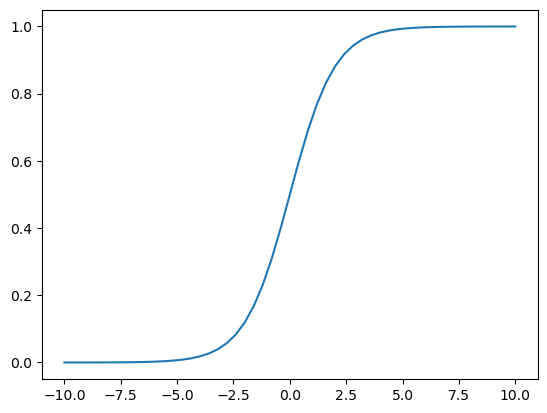

In [80]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 51)
y = sigmoid(z)
plt.plot(z, y)

In [ ]:
def linear_regression(xi, w0, w):
    result = w0
    for j in range(len(w)):
        result += xi[j]*w[j]
    return result

def logistic_regression(xi, w0, w):
    score = w0
    for j in range(len(w)):
        score += xi[j]*w[j]
    result = sigmoid(score)
    return result

### Training logistis regression with Scikit-Learn

In [81]:
from sklearn.linear_model import LogisticRegression

In [83]:
model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100000
,multi_class,'deprecated'


In [85]:
model.coef_[0].round(3)

array([ 0.682,  0.036, -0.681,  0.054, -0.017,  0.112, -0.159,  0.084,
        0.038, -0.001, -0.494,  0.69 , -0.159, -0.018, -0.189,  0.068,
        0.158,  0.115, -0.159,  0.081,  0.283, -0.159, -0.087, -0.163,
        0.2  , -0.044,  0.082, -0.053, -0.004,  0.106, -0.012,  0.068,
       -0.031,  0.193, -0.095, -0.159,  0.291, -0.055, -0.159,  0.251,
        0.233, -0.159, -0.037, -0.068,  0.   ])

In [86]:
model.intercept_[0]

np.float64(-0.047231601708094526)

In [87]:
model.predict(X_train)  # hard prediction

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

In [88]:
model.predict_proba(X_train)  # soft prediction

array([[0.92714688, 0.07285312],
       [0.32358728, 0.67641272],
       [0.36914269, 0.63085731],
       ...,
       [0.48832866, 0.51167134],
       [0.97447597, 0.02552403],
       [0.30616754, 0.69383246]], shape=(4225, 2))

In [93]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00664634, 0.20477577, 0.21778288, ..., 0.15174284, 0.7887077 ,
       0.81173196], shape=(1409,))

In [95]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True], shape=(1409,))

In [96]:
df_val[churn_decision].customerid  # ids of customers who are going to churn

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 315, dtype: object

In [97]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [98]:
y_val

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [99]:
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

In [102]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred[df_pred.correct == False]

,probability,prediction,actual,correct
9,0.465523,0,1,False
14,0.082374,0,1,False
22,0.247804,0,1,False
27,0.218366,0,1,False
31,0.516834,1,0,False
...,...,...,...,...
1386,0.454544,0,1,False
1389,0.496532,0,1,False
1391,0.463592,0,1,False
1393,0.611212,1,0,False


In [103]:
df_pred.correct.mean()

np.float64(0.8034066713981547)

### Model interpretation

In [104]:
model.coef_[0].round(3)

array([ 0.682,  0.036, -0.681,  0.054, -0.017,  0.112, -0.159,  0.084,
        0.038, -0.001, -0.494,  0.69 , -0.159, -0.018, -0.189,  0.068,
        0.158,  0.115, -0.159,  0.081,  0.283, -0.159, -0.087, -0.163,
        0.2  , -0.044,  0.082, -0.053, -0.004,  0.106, -0.012,  0.068,
       -0.031,  0.193, -0.095, -0.159,  0.291, -0.055, -0.159,  0.251,
        0.233, -0.159, -0.037, -0.068,  0.   ])

In [106]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [108]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.682),
 'contract=one_year': np.float64(0.036),
 'contract=two_year': np.float64(-0.681),
 'dependents=no': np.float64(0.054),
 'dependents=yes': np.float64(-0.017),
 'deviceprotection=no': np.float64(0.112),
 'deviceprotection=no_internet_service': np.float64(-0.159),
 'deviceprotection=yes': np.float64(0.084),
 'gender=female': np.float64(0.038),
 'gender=male': np.float64(-0.001),
 'internetservice=dsl': np.float64(-0.494),
 'internetservice=fiber_optic': np.float64(0.69),
 'internetservice=no': np.float64(-0.159),
 'monthlycharges': np.float64(-0.018),
 'multiplelines=no': np.float64(-0.189),
 'multiplelines=no_phone_service': np.float64(0.068),
 'multiplelines=yes': np.float64(0.158),
 'onlinebackup=no': np.float64(0.115),
 'onlinebackup=no_internet_service': np.float64(-0.159),
 'onlinebackup=yes': np.float64(0.081),
 'onlinesecurity=no': np.float64(0.283),
 'onlinesecurity=no_internet_service': np.float64(-0.159),
 'onlinesecurity=yes': np

In [109]:
small = ['contract', 'tenure', 'monthlycharges']
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [110]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [111]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [112]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [113]:
X_train_small = dv_small.transform(dicts_train_small)

In [114]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [116]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.47795759544661)

In [117]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [118]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

### Using the model

In [122]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
y_full_train = df_full_train.churn.values
model = LogisticRegression(max_iter=10000).fit(X_full_train, y_full_train)

In [123]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)
y_pred = model.predict_proba(X_test)[:, 1]

In [124]:
churn_decision = (y_pred >= 0.5)
(churn_decision == y_test).mean()

np.float64(0.8126330731014905)

In [126]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [128]:
X_small = dv.transform([customer])
model.predict_proba(X_small)[0, 1]

np.float64(0.4805322747531604)

In [129]:
y_test[10]

np.int64(0)

In [130]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [131]:
X_small = dv.transform([customer])
model.predict_proba(X_small)[0, 1]

np.float64(0.6400363083601036)

In [132]:
y_test[-1]

np.int64(1)